We will solve a Poisson equation:
$$\Delta u=2,\quad x\in[-1,1],$$
with the Neumman boundary conditions on the right boundary:
$$\left.\frac{du}{dx}\right|_{x=1}=4$$
and Dirichlet boundary conditions on the left boundary:
$$u(-1)=0.$$
The exact solution is:
$$u(x)=(x+1)^2.$$

Compiling model...
'compile' took 0.000588 s



Training model...

0         [3.98e+00, 1.40e-01, 1.36e+01]    [4.01e+00, 1.40e-01, 1.36e+01]    [9.24e-01]    
1000      [1.98e-04, 3.57e-09, 8.57e-08]    [1.34e-04, 3.57e-09, 8.57e-08]    [6.16e-04]    

Best model at step 1000:
  train loss: 1.99e-04
  test loss: 1.34e-04
  test metric: [6.16e-04]

'train' took 6.857570 s

Saving loss history to h:\毕业论文\demo\demo_poisson_NeumannBC\loss.dat ...
Saving training data to h:\毕业论文\demo\demo_poisson_NeumannBC\train.dat ...
Saving test data to h:\毕业论文\demo\demo_poisson_NeumannBC\test.dat ...


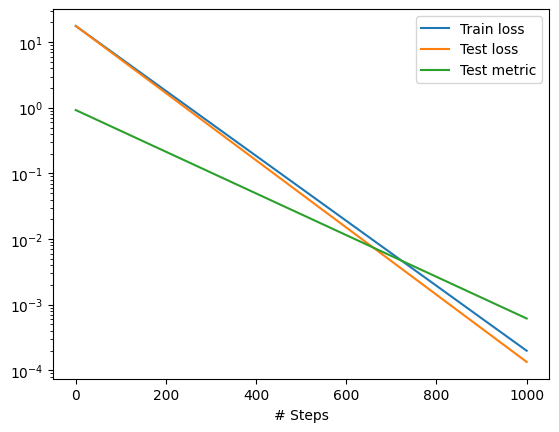

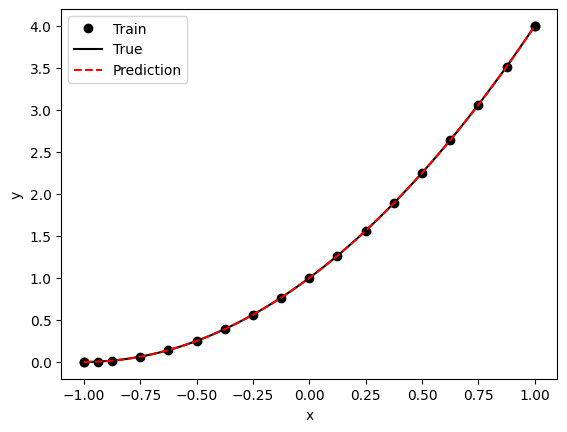

In [2]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, paddle"""
import deepxde as dde
import numpy as np


def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    return dy_xx - 2


def boundary_l(x, on_boundary):
    return on_boundary and dde.utils.isclose(x[0], -1)


def boundary_r(x, on_boundary):
    return on_boundary and dde.utils.isclose(x[0], 1)


def func(x):
    return (x + 1) ** 2


geom = dde.geometry.Interval(-1, 1)
bc_l = dde.icbc.DirichletBC(geom, func, boundary_l)
bc_r = dde.icbc.NeumannBC(geom, lambda X: 2 * (X + 1), boundary_r)
data = dde.data.PDE(geom, pde, [bc_l, bc_r], 16, 2, solution=func, num_test=100)

layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=1000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)